# Lançamento de projéteis: uma introdução

* PET - Física UFRN
* Petiano: Moisés da Rocha Alves
* Data: 14 de Setembro de 2022

O objetivo deste `Notebook` é introduzirmos o lançamento de projéteis, como o nome já indica. Descreveremos o problema e, a medida que formos prosseguindo, adicionaremos mais complexidade nele.

Dito isto, este `Notebook` estará dividido em três seções principais:
1. A descrição do lançamento de um projétil
2. A resistência do ar
3. Adicionando mais um grau de complexidade: a densidade do ar

Agora vamos as bibliotecas e ao `Notebook` de fato.

### Importando as bibliotecas necessárias

Neste `Notebook`, utilizaremos as bibliotecas `matplotlib`, `numpy` e `scipy`. Definirei também uma função chamada `opt_plot()` para melhorar o plot dos gráficos, a qual peguei emprestada dos `Notebooks` de meu colega de projeto (o link para seus `Notebooks` pode ser encontrado [aqui](https://github.com/GabrielWendell/PET.py/)).

In [50]:
import matplotlib.pyplot as plt
import scipy.constants as sconst
import numpy as np

def opt_plot():
    plt.grid(True, linestyle=':', color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis = 'both', which = 'minor', direction = "in",
                        top = True, right = True, length = 5, width = 1, labelsize = 15)
    plt.tick_params(axis = 'both', which = 'major', direction = "in",
                        top = True, right = True, length = 8, width = 1, labelsize = 15)

### Detalhes das bibliotecas

In [51]:
%load_ext version_information
%version_information Matplotlib, Numpy, Scipy

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.9.12 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.2.0
OS Windows 10 10.0.19042 SP0
Matplotlib 3.5.1
Numpy 1.21.5
Scipy 1.7.3
Mon Sep 12 22:16:57 2022 Hora Padrão de Buenos Aires

## 1. A descrição do lançamento de um projétil

Bom, primeiramente nos perguntemos: qual a maneira mais simples que temos de descrevermos um projétil? Queremos imaginar um projétil que seja disparado de algum lugar, com certa velocidade e ângulos específicos dados no início do lançamento.

Para responder a pergunta, faremos o que sempre é feito na física como um todo: abstrair o problema e tentar examinar-lo sem muitos graus de complexidade. Isto será feito para que possamos obter uma descrição mais fundamental (e também mais simples) do problema. Sendo assim, partiremos pra descrição física que o leitor já deve estar habituado: a de um lançamento oblíquo (não entrarei em detalhes neste `Notebook` sobre esta descrição, já que ela pode ser encontrada em vários lugares da internet).

Sendo assim, podemos descrever o projétil em sua forma mais fundamental com as seguintes equações diferenciais:

$$
\frac{d^2x}{dt^2} = 0,
$$
$$
\frac{d^2y}{dt^2} = -g.
$$

Essas equações diferenciais são simples de se resolver analiticamente e nos levam a solução conhecida para lançamentos oblíquos. Mas não iremos resolver nada analiticamente por aqui! Para resolver estas equações, utilizaremos o método de Runge-Kutta. 

Em geral, utilizaremos este método para as diferentes equações diferenciais que aparecerão neste `Notebook`, então cabe uma seção para relembrarmos o método.

### 1.1 O método de Runge Kutta de 4ª ordem

Recordemos como é enunciado o método de Runge-Kutta de 4ª ordem (RK4).

Seja um problema de valor inicial especificado tal que:

$$
y' = f(t, y), \ \ y(t_0) = y_0.
$$

Então o método RK4 para este problema é dado pelas seguintes equações:

$$
y_{n+1} = y_{n} + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4),
$$

$$
t_{n+1} = t_{n} + h,
$$

onde $y_{n+1}$ é a aproximação por RK4 de $y(t_{n+1})$, e

$$
k_1 = f(t_n,y_n),
$$
$$
k_2 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1),
$$
$$
k_3 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2),
$$
$$
k_4 = f(t_n + h, y_n + hk_3).
$$

### 1.2 Resolvendo o lançamento simples de um projétil

Primeiramente, por fins práticos, escreveremos nossas equações desta forma:

$$
\frac{dx}{dt} = v_x,
$$
$$
\frac{dv_x}{dt} = 0,
$$
$$
\frac{dy}{dt} = v_y,
$$
$$
\frac{dv_y}{dt} = -g,
$$

onde $v_x$ e $v_y$ são as velocidades em $x$ e em $y$, respectivamente.

Conforme enunciamos o método RK4, teremos 4 funções $f$ associadas a cada expressão acima.

Dado o nosso problema, teremos uma função $f$ para cada uma das 4 EDO's originadas. Portanto:

$$
f_x = v_x,
$$

$$
f_{v_x} = 0,
$$

$$
f_y = v_y,
$$

$$
f_{v_y} = -g.
$$

Agora, é necessário que tenhamos um problema de valor inicial. Isto é, devemos ter os valores iniciais (em $t=0$) de $x$, $v_x$, $y$ e $v_y$. Para que não seja necessário utilizarmos velocidades em $x$ e em $y$, especificaremos o ângulo de lançamento inicial $\theta_0$ em relação ao eixo $x$ e a velocidade inicial $v_0$ (módulo do vetor velocidade) para as condições iniciais do nosso problema. Assim, as velocidades iniciais em cada eixo poderão ser dadas através das relações $v_x(t=0) = v_0 \cdot cos(\theta_0)$ e $v_y(t=0) = v_0 \cdot sin(\theta_0)$.

Partindo pro problema, considere que estamos tentando atirar uma bola de canhão esférica. Considerando que uma bola de canhão tem sua velocidade de saída dada em cerca de 512 m/s (ref. [3]), utilizaremos os seguintes valores para $t = 0$ no nosso problema:

|      | Valores iniciais |
|:-----:|:-------:|
|   $v_0$   | 512 m/s |
| $\theta_0$ |   60°   |
|   $x$   |    0    |
|   $y$   |    0    |

Em código, colocamos da seguinte maneira, já convertendo os valores de $v_0$ e $\theta_0$ para as componentes de cada eixo da velocidade $v_x$ e $v_y$:

In [52]:
v0 = 512
theta0 = 60*np.pi/180
x, y = 0, 0

vx0 = v0*np.cos(theta0)
vy0 = v0*np.sin(theta0)

Para o valor da constante gravitacional, utilizaremos o valor contido no `scipy.constants`, equivalente a $g \approx 9.81 \ m/s^2$.

Agora, resta implementarmos o método RK4. Para isso, definiremos primeiramente uma array `r` que conterá todos os valores iniciais, o range de tempo que escolheremos para avaliar nossas equações e o número de pontos que usaremos.

In [53]:
r = np.array([x, vx0, y, vy0],float)
t1, t2 = 0, 100.0
N = 5000
h = (t2-t1)/N

Conforme o código acima, iremos avaliar 5000 pontos dentro de um range de tempo de $t = 0$ até $t = 100s$.

Definiremos, também, nossa função `f`, que receberá como parâmetro a array `r` (que leva consigo os valores de $x$, $v_x$, $y$ e $v_y$). Esta função terá como retorno uma outra array com os valores de $f_x$, $f_{v_x}$, $f_y$ e $f_{v_y}$. É importante definirmos esta função, já que ela é diretamente necessária para a execução do método RK4.

In [54]:
def f(r,t):
    x, vx, y, vy = r[0],r[1],r[2],r[3]

    fx = vx
    fvx = 0
    fy = vy
    fvy = -sconst.g

    return np.array([fx, fvx, fy, fvy], float)

Agora, implementaremos a função que executará o método RK4.

In [55]:
def RK4(r,t):
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    return r+(1/6)*(k1+2*k2+2*k3+k4)

Agora, resta rodarmos o código, computarmos os valores e plotarmos o gráfico. Faremos assim:

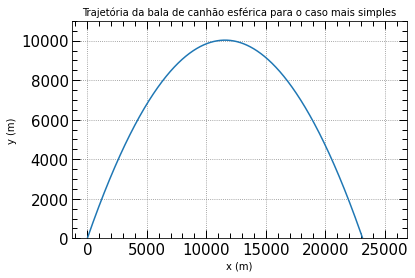

In [56]:
# Definindo as listas que conterão os valores
tempos = np.linspace(t1, t2, N)
y_list = []
x_list = []

# Computando os valores pelo método RK4
for t in tempos:
    r = RK4(r,t)
    x_list.append(r[0])
    y_list.append(r[2])

# Plotando o gráfico da trajetória e a linha de referência
opt_plot()
plt.title("Trajetória da bala de canhão esférica para o caso mais simples", fontsize = 10)
plt.plot(x_list, y_list)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.ylim(0, 1.1e4)
plt.show()

Bom, é natural pensar: como, supostamente, uma bola de canhão alcançaria uma altura de cerca de 10 km? Parece irreal, certo? E é.

A explicação mais direta é que não adicionamos camadas de complexidade o suficiente no nosso problema. O que adicionaremos agora? O ar. Ou melhor, a resistência do ar.

## 2. A resistência do ar

A resistência do ar, ou simplesmente o arrasto (drag), é um tipo de força resistiva que atua contrária ao sentido do movimento. Isto é, atua sempre no sentido contrário a velocidade.

Poderíamos passar um bom tempo discutindo sobre este tópico, já que ele pode se tornar complexo o suficiente para isso. Mas aqui não faremos isso. Fato é que precisamos de um modelo para a força resistiva do ar.

De maneira bem grosseira, podemos dizer que a força resistiva do ar tem a seguinte forma:

$$
F_{drag} \approx -B_1v - B_2v^2
$$

Isto é, é uma força que leva diretamente o módulo da velocidade em consideração, diferente das forças de atrito comuns. O leitor pode notar, ainda, que a relação acima nos lembra uma expansão de Taylor e isso está correto! Para baixas velocidades, o primeiro termo é predominante, enquanto para velocidades um pouco mais altas, o segundo termo começa a ser mais predominante. Em geral, o segundo termo costuma ser bem mais relevante na maioria dos casos e é ele que usaremos em nossas aproximações.

Ainda, notemos que existem constantes de proporcionalidades envolvidas nestas aproximações. E, claro, devemos estimar estas constantes. Em particular, enquanto a constante $B_1$ pode ser determinada para objetos com forma simples, a constante $B_2$, a qual estamos interessados, é difícil de ser calculada mesmo nos casos mais simples, nos restando fazer uma aproximação grosseira de seu valor.

Enquanto um objeto se move pelo ar, ele deve puxar o ar em sua frente para tal, movendo uma certa massa de ar. A quantidade infinitesimal de massa de ar movida pode ser dada por $dm_{ar} = \rho\ dV$, onde $\rho$ é a densidade do ar e $dV$ é o volume da massa de ar movida (e também o volume do objeto). Com isso, podemos estimar a taxa de massa de ar movida em um tempo $dt$: 

$$
\frac{dm_{ar}}{dt} \backsim \rho \frac{dV}{dt} \backsim \rho A v
$$

Estimando uma velocidade de ordem $v$ para o ar, podemos estimar que sua energia cinética será dada na ordem de:

$$
K = 
$$

## Referências

**[1]** *Giordano, N. J., & Nakanishi, H. (2006). Computational physics.*

**[2]** <https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods>

**[3]** <https://www.arc.id.au/CannonBallistics.html>

**[4]** Hoerner, Sighard F. (1965). [Fluid-Dynamic Drag : Practical Information on Aerodynamic Drag and Hydrodynamic Resistance](https://archive.org/details/FluidDynamicDragHoerner1965) (2 ed.).